# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
os.chdir('/Users/calebward/LHL_project_IV')
df = pd.read_csv("data/data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Look at some basic statistics for numerical variables.

In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [4]:
for col in df[['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']]:
    print(df[col].unique())

['Male' 'Female' nan]
['No' 'Yes' nan]
['Graduate' 'Not Graduate']
['No' 'Yes' nan]
['Urban' 'Rural' 'Semiurban']
['Y' 'N']


Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

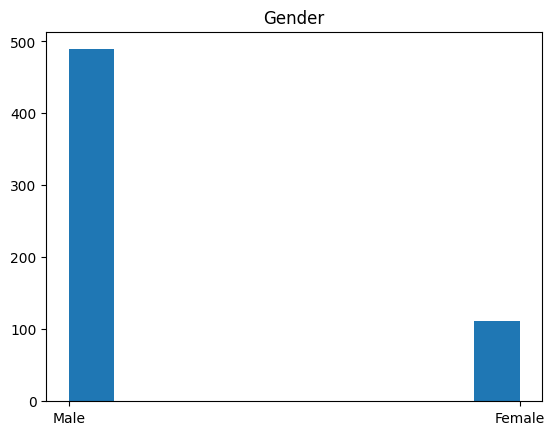

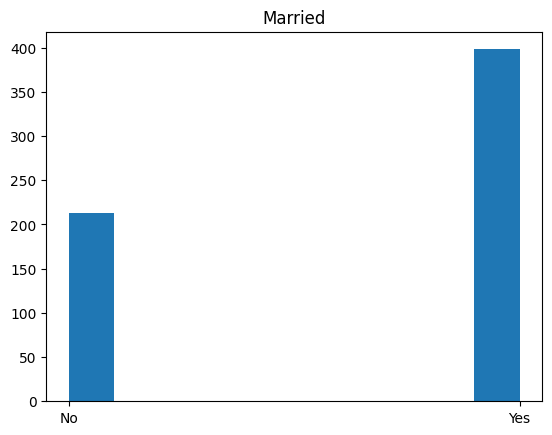

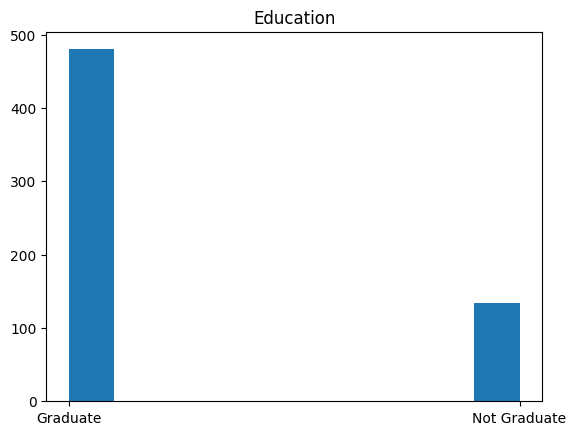

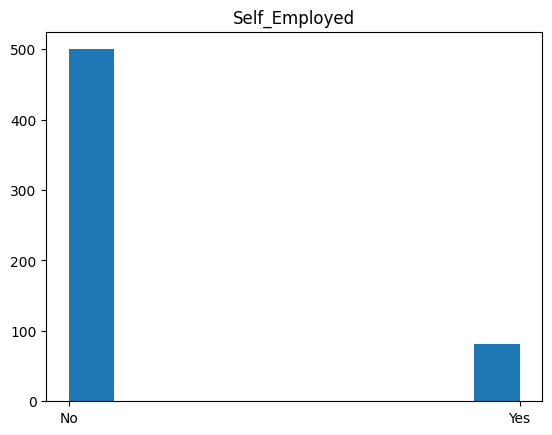

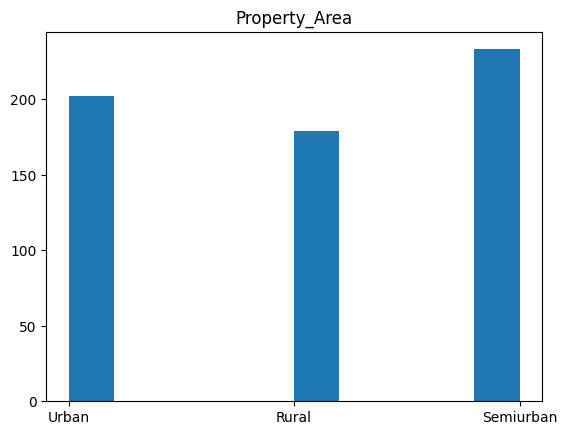

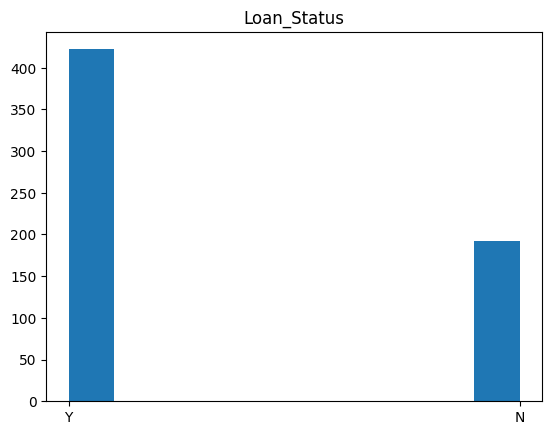

In [5]:
for col in df[['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']]:
    plt.title(col)
    plt.hist(df[col].dropna())
    plt.show()

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



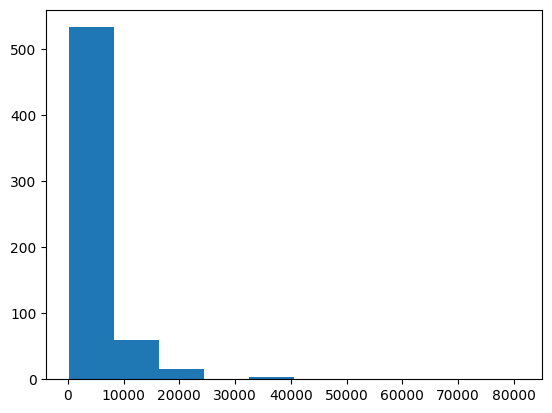

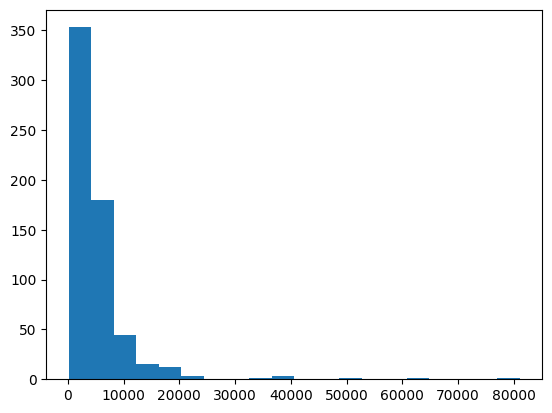

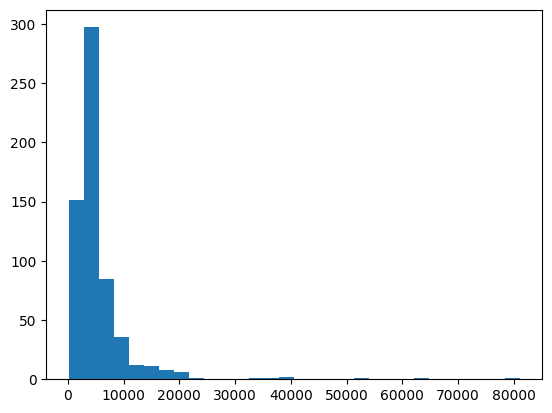

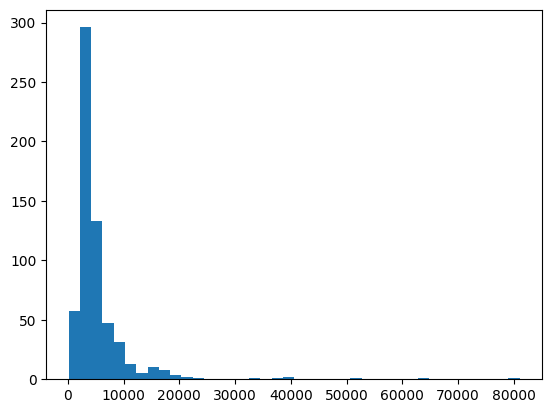

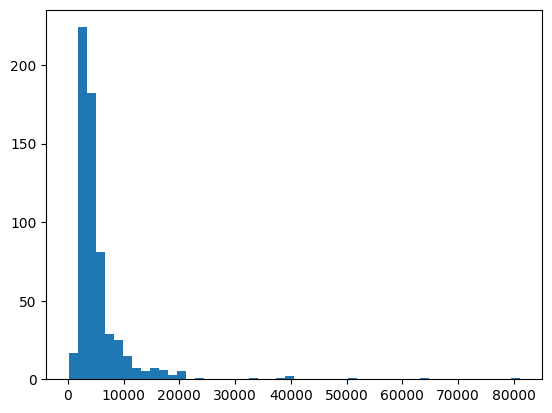

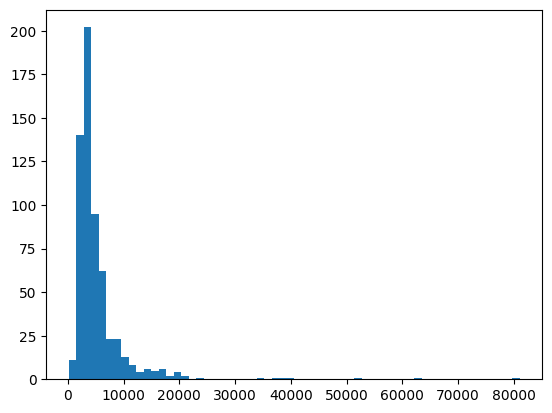

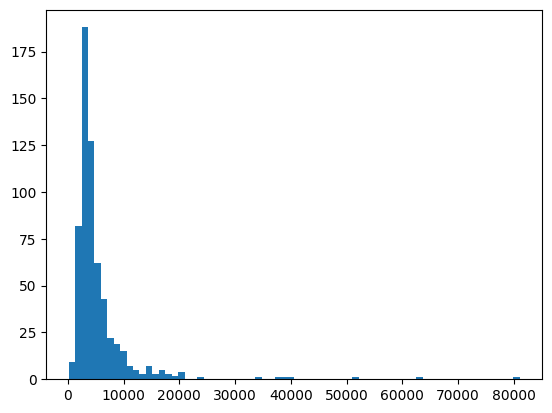

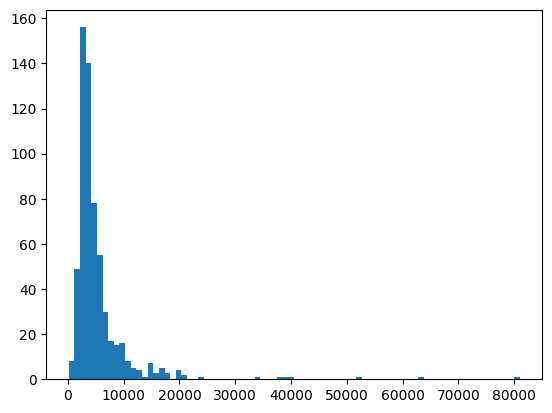

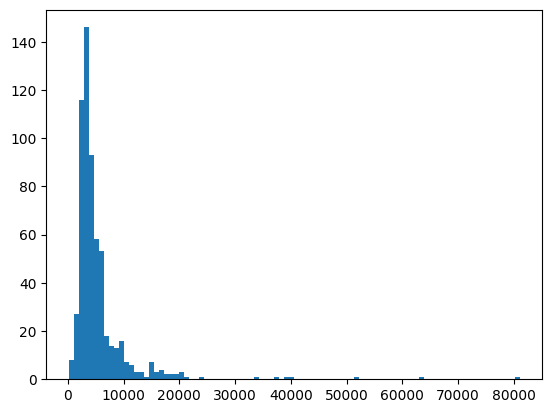

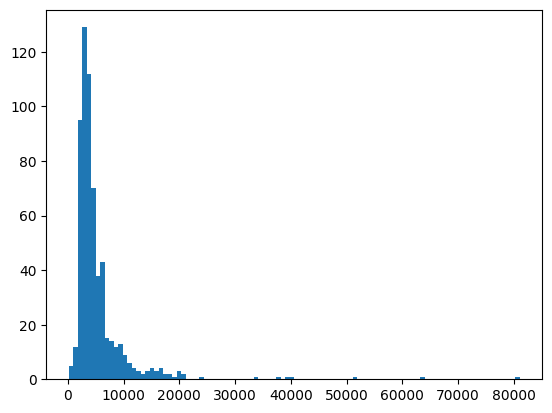

In [11]:
for i in range(10):
    plt.hist(df.ApplicantIncome, bins = 10*(i+1))
    plt.show()


Look at box plots to understand the distributions. 

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb4b05e2b80>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb4b05f3100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb4b05e28e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb4b05f3640>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb4b05f38e0>],
 'means': []}

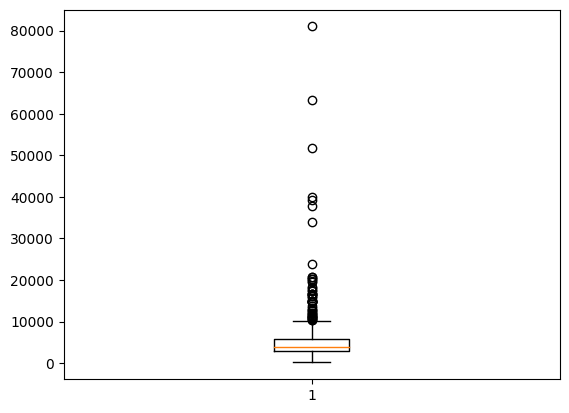

In [6]:
plt.boxplot(df.ApplicantIncome)

Look at the distribution of income segregated  by `Education`

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb4b0608d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb4b0586310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb4b0608b50>,
 'medians': [<matplotlib.lines.Line2D at 0x7fb4b0586850>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb4b0586af0>,
 'means': []}

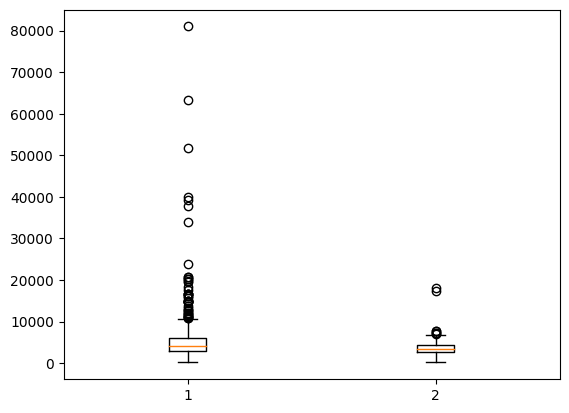

In [7]:
plt.boxplot([df.loc[df.Education == 'Graduate']['ApplicantIncome'],df.loc[df.Education == 'Not Graduate']['ApplicantIncome']])

Look at the histogram and boxplot of LoanAmount

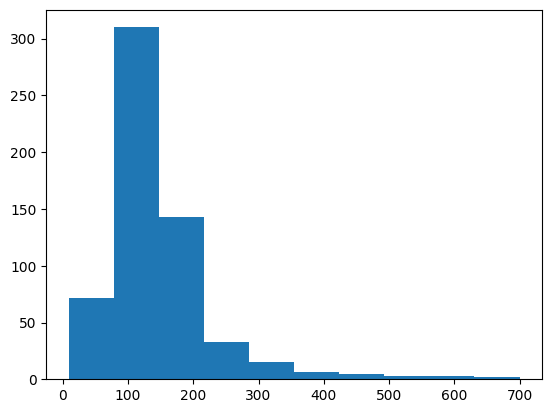

In [8]:
plt.hist(df.LoanAmount)
plt.show()

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [18]:
pd.pivot_table(df, index=['Gender','Married','Education','Self_Employed','Property_Area'])

/var/folders/2v/vpx_7m4n5hndgbt2_txpfwxw0000gp/T/ipykernel_60156/1014264163.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pd.pivot_table(df, index=['Gender','Married','Education','Self_Employed','Property_Area'])


ApplicantIncome  \
Gender Married Education    Self_Employed Property_Area                    
Female No      Graduate     No            Rural              4088.076923   
                                          Semiurban          4169.238095   
                                          Urban              4165.000000   
                            Yes           Rural              7441.000000   
                                          Semiurban          7803.400000   
                                          Urban              2981.500000   
               Not Graduate No            Rural              3642.250000   
                                          Semiurban          2845.333333   
                                          Urban              2152.333333   
                            Yes           Semiurban         10565.000000   
                                          Urban             18165.000000   
       Yes     Graduate     No            Rural              4583.000000   
                                          Semiurban          3907.571429   
                                          Urban              5577.600000   
                            Yes           Rural              5500.000000   
                                          Semiurban         19484.000000   
                                          Urban             11500.000000   
               Not Graduate No            Rural              4100.000000   
                                          Semiurban          2364.666667   
                            Yes           Rural              7142.000000   
Male   No      Graduate     No            Rural              5871.888889   
                                          Semiurban          5713.750000   
                                          Urban              4005.384615   
                            Yes           Rural              5971.333333   
                                          Semiurban          6400.333333   
                                          Urban             11841.500000   
               Not Graduate No            Rural              4208.900000   
                                          Semiurban          3651.888889   
                                          Urban              2548.000000   
                            Yes           Rural              2583.000000   
                                          Semiurban          4284.500000   
                                          Urban              4053.000000   
       Yes     Graduate     No            Rural              6536.950000   
                                          Semiurban          5581.058824   
                                          Urban              5290.038462   
                            Yes           Rural              7663.466667   
                                          Semiurban          8400.571429   
                                          Urban              5692.444444   
               Not Graduate No            Rural              3640.391304   
                                          Semiurban          3365.863636   
                                          Urban              3522.923077   
                            Yes           Rural              4898.333333   
                                          Semiurban          3184.000000   
                                          Urban              5510.000000   

                                                         CoapplicantIncome  \
Gender Married Education    Self_Employed Property_Area                      
Female No      Graduate     No            Rural                 964.692308   
                                          Semiurban             621.666667   
                                          Urban                 353.368421   
                            Yes           Rural                   0.000000   
                                          Semiurban             343.400000   
              

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [29]:

for col in df.iloc[:,1:-1]:
    print(f'{col} : {df[col].sort_values().unique()}')

Gender : ['Female' 'Male' nan]
Married : ['No' 'Yes' nan]
Dependents : ['0' '1' '2' '3+' nan]
Education : ['Graduate' 'Not Graduate']
Self_Employed : ['No' 'Yes' nan]
ApplicantIncome : [  150   210   416   645   674  1000  1025  1299  1378  1442  1500  1538
  1600  1625  1668  1759  1782  1800  1809  1811  1820  1828  1830  1836
  1853  1863  1875  1880  1907  1916  1926  1928  1958  1963  1977  1993
  2000  2014  2031  2045  2058  2060  2071  2083  2130  2132  2137  2138
  2149  2165  2167  2178  2192  2213  2214  2221  2237  2239  2253  2275
  2281  2297  2301  2309  2330  2333  2346  2366  2378  2383  2395  2400
  2423  2425  2435  2439  2454  2473  2479  2483  2484  2491  2492  2499
  2500  2507  2510  2526  2550  2577  2583  2600  2609  2620  2625  2645
  2647  2653  2661  2666  2667  2679  2698  2699  2708  2717  2718  2720
  2726  2750  2755  2764  2768  2769  2785  2787  2799  2833  2873  2875
  2876  2882  2889  2894  2895  2900  2917  2920  2927  2929  2935  2947
  2957  2958

In [33]:
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

Combine both incomes as total income and take a log transformation of the same.

## 4. Building a Predictive Model

Try paramater grid search to improve the results

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python